In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from prepare import prepare_store_data, prepare_ops_data

In [8]:
import warnings
warnings.filterwarnings('ignore')

Remember to document your thoughts and any takeaways as you work through visualizations!

In [24]:
# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

## Exercise 1
Using your store items data you prepped in lesson 2 exercises:

In [34]:
df = prepare_store_data()
df.head()

,store_address,store_city,store_state,store_zipcode,item,sale_amount,sale_id,store,item_brand,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total,diff(1)
sale_date,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Tuesday,10.92,NaN
2013-01-01 00:00:00+00:00,2118 Fredericksburg Rdj,San Antonio,TX,78201,17,26.0,295813,3,Ducal,Ducal Refried Red Beans,1.16,88313590791,88313590791,January,Tuesday,30.16,19.24
2013-01-01 00:00:00+00:00,8503 NW Military Hwy,San Antonio,TX,78231,7,32.0,125995,10,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,January,Tuesday,308.48,278.32
2013-01-01 00:00:00+00:00,2118 Fredericksburg Rdj,San Antonio,TX,78201,18,45.0,314073,3,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,January,Tuesday,197.55,-110.93
2013-01-01 00:00:00+00:00,2118 Fredericksburg Rdj,San Antonio,TX,78201,19,34.0,332333,3,Careone,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,January,Tuesday,25.16,-172.39


In [35]:
df.shape

(913000, 17)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 00:00:00+00:00 to 2017-12-31 00:00:00+00:00
Data columns (total 17 columns):
store_address    913000 non-null object
store_city       913000 non-null object
store_state      913000 non-null object
store_zipcode    913000 non-null int64
item             913000 non-null int64
sale_amount      913000 non-null float64
sale_id          913000 non-null int64
store            913000 non-null int64
item_brand       913000 non-null object
item_name        913000 non-null object
item_price       913000 non-null float64
item_upc12       913000 non-null int64
item_upc14       913000 non-null int64
month            913000 non-null object
day_of_week      913000 non-null object
sales_total      913000 non-null float64
diff(1)          912999 non-null float64
dtypes: float64(4), int64(6), object(7)
memory usage: 145.4+ MB


In [37]:
df.sales_total.describe()

count    913000.000000
mean        280.898866
std         227.686575
min           0.000000
25%          98.010000
50%         233.280000
75%         402.780000
max        2104.410000
Name: sales_total, dtype: float64

- Split your data into train and test using the sklearn.model_selection.TimeSeriesSplit method.

In [7]:
df.index.year.value_counts()

2016    183000
2017    182500
2015    182500
2014    182500
2013    182500
Name: sale_date, dtype: int64

In [38]:
# split data based on human experience
train = df[:'2016']
test = df['2017']


- Validate your splits by plotting X_train and y_train.

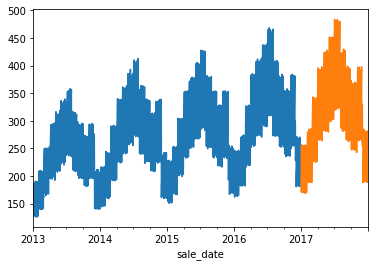

In [39]:
train.resample('D').sales_total.mean().plot()
test.resample('D').sales_total.mean().plot()

- Plot the weekly average & the 7-day moving average. Compare the 2 plots.

In [14]:
df.columns

Index(['store_address', 'store_city', 'store_state', 'store_zipcode', 'item',
       'sale_amount', 'sale_id', 'store', 'item_brand', 'item_name',
       'item_price', 'item_upc12', 'item_upc14', 'month', 'day_of_week',
       'sales_total', 'diff(1)'],
      dtype='object')

In [21]:
y = train.sales_total

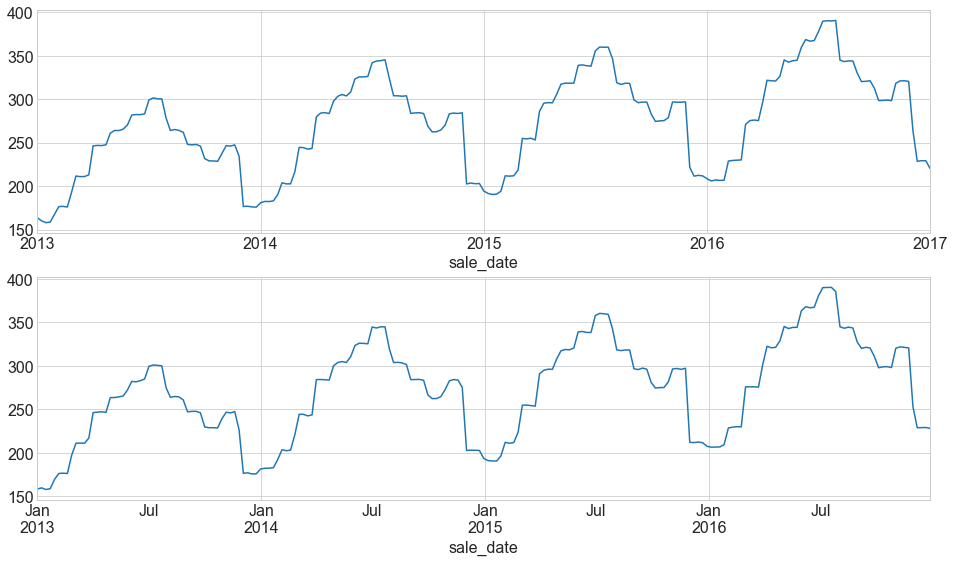

In [26]:
fig,(ax1, ax2)= plt.subplots(2,1, figsize = (16,9))

y.resample('W').mean().plot(ax =ax1)
y.resample('7D').mean().plot(ax =ax2)

So they look like the same.

- Plot the daily difference. Observe whether usage seems to vary drastically from day to day or has more of a smooth transition.

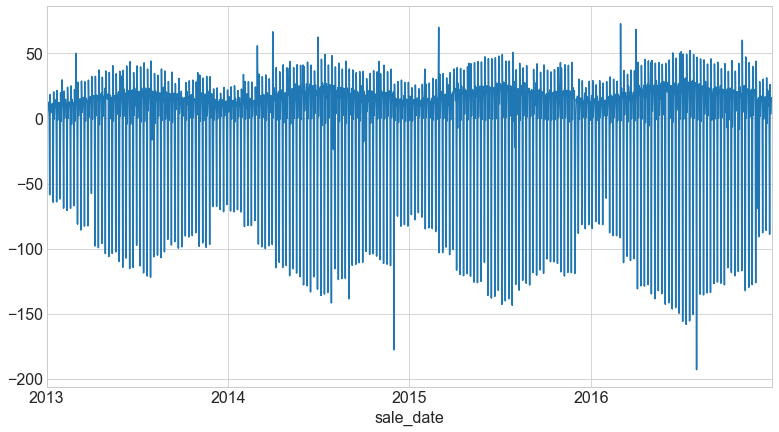

In [29]:
y.resample('D').mean().diff(1).plot()

It changes pretty drastically on daily basis.

- Plot a time series decomposition.

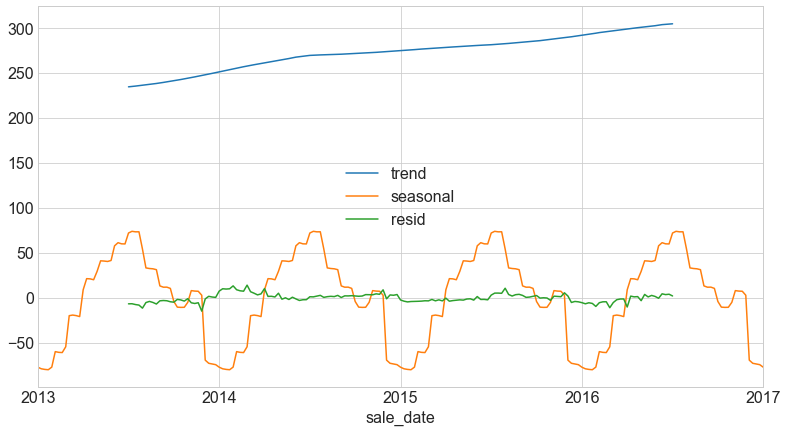

In [35]:
y = train.sales_total.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.iloc[:, 1:].plot()


- Create a lag plot (day over day).

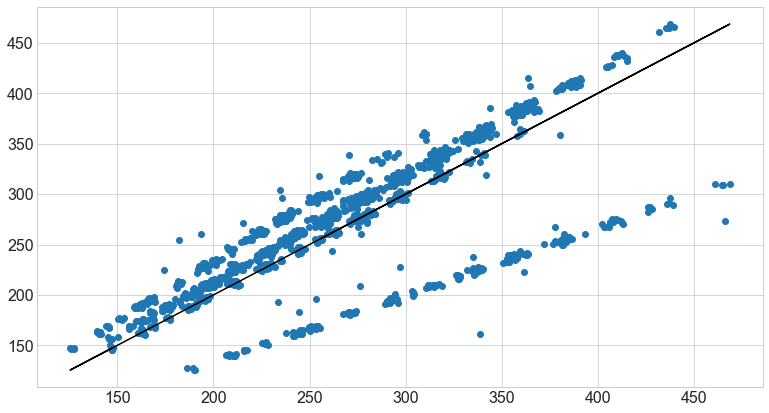

In [45]:
y = train.sales_total.resample('D').mean()
y_shift = y.shift(-1)

plt.scatter(y, y_shift)
plt.plot(y, y, color = 'black')

- Run a lag correlation.

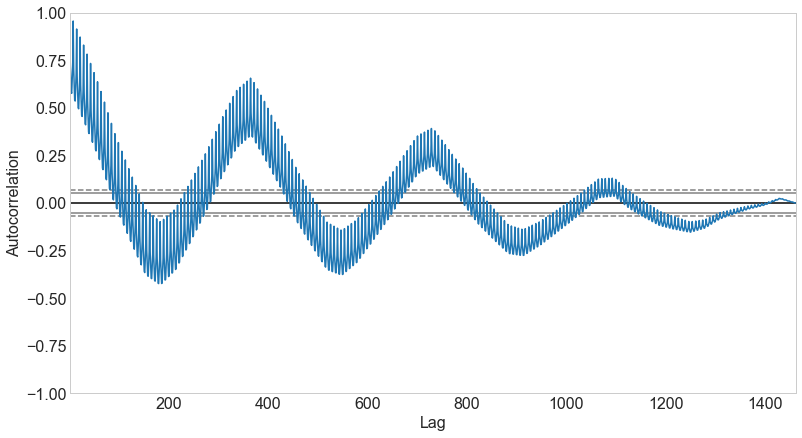

In [46]:
pd.plotting.autocorrelation_plot(y)

## Exercise 2
Using your OPS data you prepped in lesson 2 exercises:

In [3]:
df = prepare_ops_data()
df.head(1)

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,1,2006


- Split your data into train and test using the percent cutoff method.

In [5]:
train_size = .7
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index]
test = df[test_start_index:]

- Validate your splits by plotting X_train and y_train.

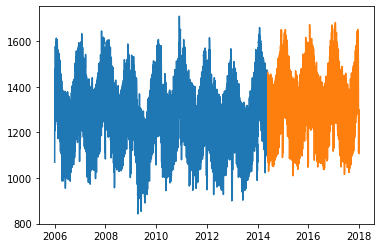

In [9]:
plt.plot(train.index, train.Consumption)
plt.plot(test.index, test.Consumption)

- Plot the weekly average & the 7-day moving average. Compare the 2 plots.

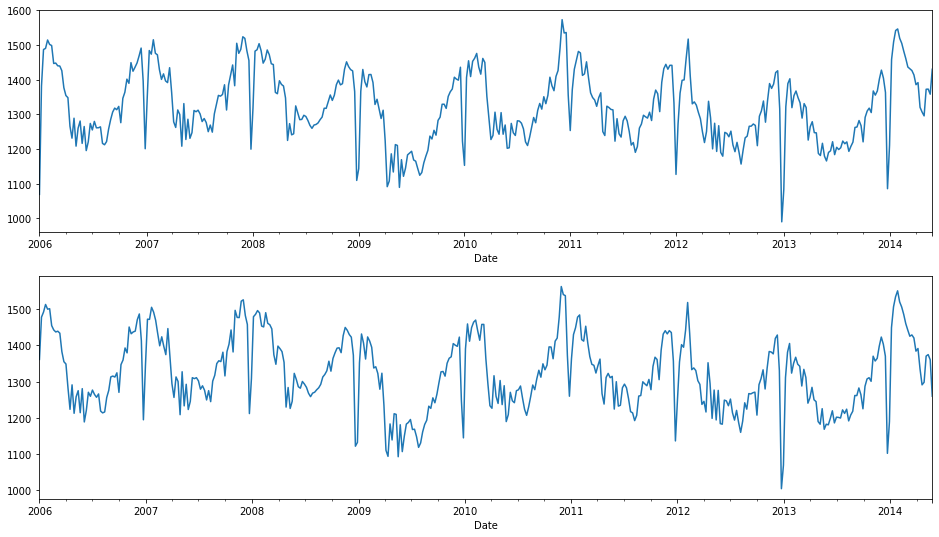

In [10]:
y = train.Consumption
fig,(ax1, ax2)= plt.subplots(2,1, figsize = (16,9))

y.resample('W').mean().plot(ax =ax1)
y.resample('7D').mean().plot(ax =ax2)

- Group the electricity consumption time series by month of year, to  explore annual seasonality.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

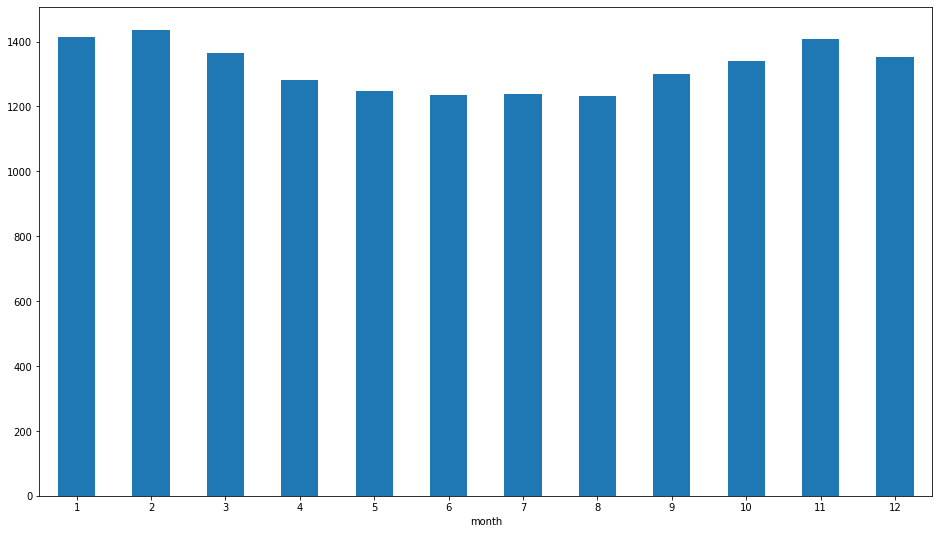

In [19]:
train.groupby('month').Consumption.mean().plot.bar(figsize = (16,9))
plt.xticks(rotation = 0)

- Plot the daily difference. Observe whether usage seems to vary  drastically from day to day or has more of a smooth transition.

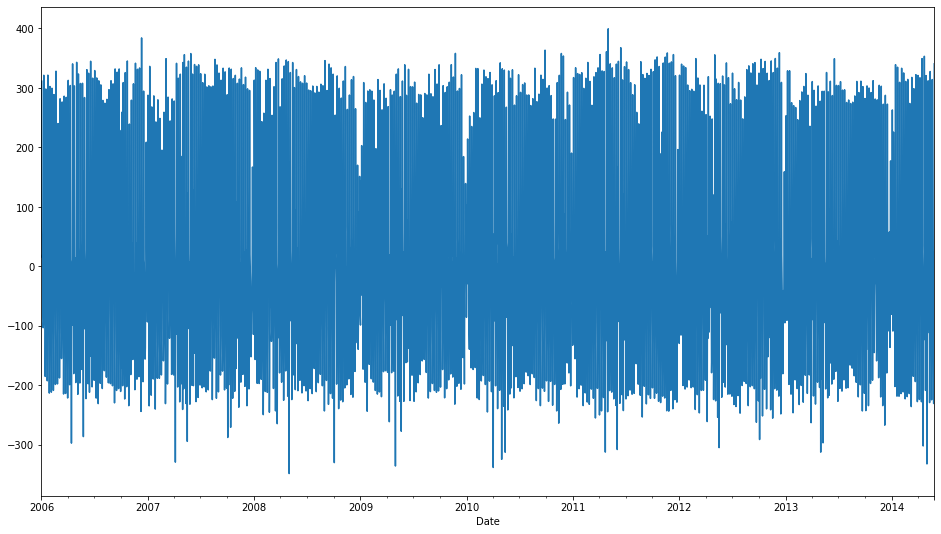

In [21]:
y.resample('D').mean().diff(1).plot(figsize = (16,9))

- Plot a time series decomposition. Takeaways?

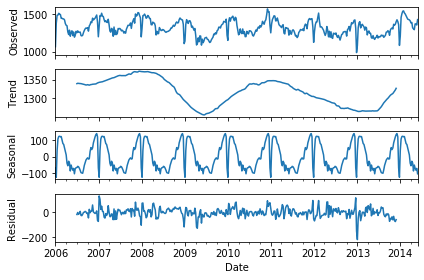

In [31]:
y = train.Consumption.resample('W').mean()
result = sm.tsa.seasonal_decompose(y)
result.plot()
None

## Exercise 3
If time:

For each store I want to see how many items were sold over a period of time, for each item. Find a way to chart this. Hints: Subplots for the piece with the fewest distinct values (like store), x = time, y = count, color = item. If you have too many distinct items, you may need to plot the top n, while aggregating the others into an 'other' bucket.